In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [5]:
flights_wide = flights.pivot(index = 'year' , columns = 'month' , values = 'passengers')
for _ , col in flights_wide.items():
    print(_ , col)

Jan year
1949    112
1950    115
1951    145
1952    171
1953    196
1954    204
1955    242
1956    284
1957    315
1958    340
1959    360
1960    417
Name: Jan, dtype: int64
Feb year
1949    118
1950    126
1951    150
1952    180
1953    196
1954    188
1955    233
1956    277
1957    301
1958    318
1959    342
1960    391
Name: Feb, dtype: int64
Mar year
1949    132
1950    141
1951    178
1952    193
1953    236
1954    235
1955    267
1956    317
1957    356
1958    362
1959    406
1960    419
Name: Mar, dtype: int64
Apr year
1949    129
1950    135
1951    163
1952    181
1953    235
1954    227
1955    269
1956    313
1957    348
1958    348
1959    396
1960    461
Name: Apr, dtype: int64
May year
1949    121
1950    125
1951    172
1952    183
1953    229
1954    234
1955    270
1956    318
1957    355
1958    363
1959    420
1960    472
Name: May, dtype: int64
Jun year
1949    135
1950    149
1951    178
1952    218
1953    243
1954    264
1955    315
1956    374
1957    42

[year
1949    112
1950    115
1951    145
1952    171
1953    196
1954    204
1955    242
Name: Jan, dtype: int64, year
1952    242
1953    272
1954    293
1955    347
1956    405
1957    467
1958    505
1959    559
1960    606
Name: Aug, dtype: int64]


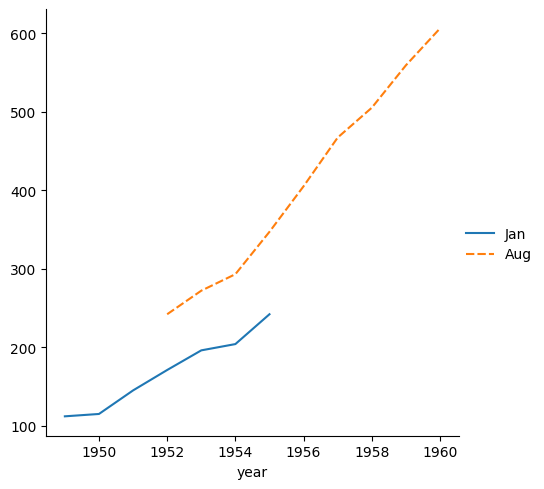

In [6]:
two_series = [flights_wide.loc[:1955, "Jan"], flights_wide.loc[1952:, "Aug"]]
print(two_series)
sns.relplot(data=two_series, kind="line")

In [7]:
twodict = {s.name : s for s in two_series}
twodict

{'Jan': year
 1949    112
 1950    115
 1951    145
 1952    171
 1953    196
 1954    204
 1955    242
 Name: Jan, dtype: int64,
 'Aug': year
 1952    242
 1953    272
 1954    293
 1955    347
 1956    405
 1957    467
 1958    505
 1959    559
 1960    606
 Name: Aug, dtype: int64}

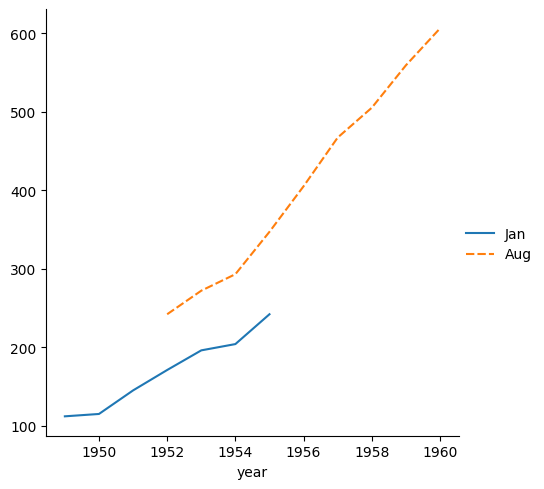

In [8]:
sns.relplot(data = twodict , kind = 'line')

In [9]:
sns.__version__

'0.13.2'

### seaborn.objects interface


In [10]:
import seaborn.objects as so

In [11]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


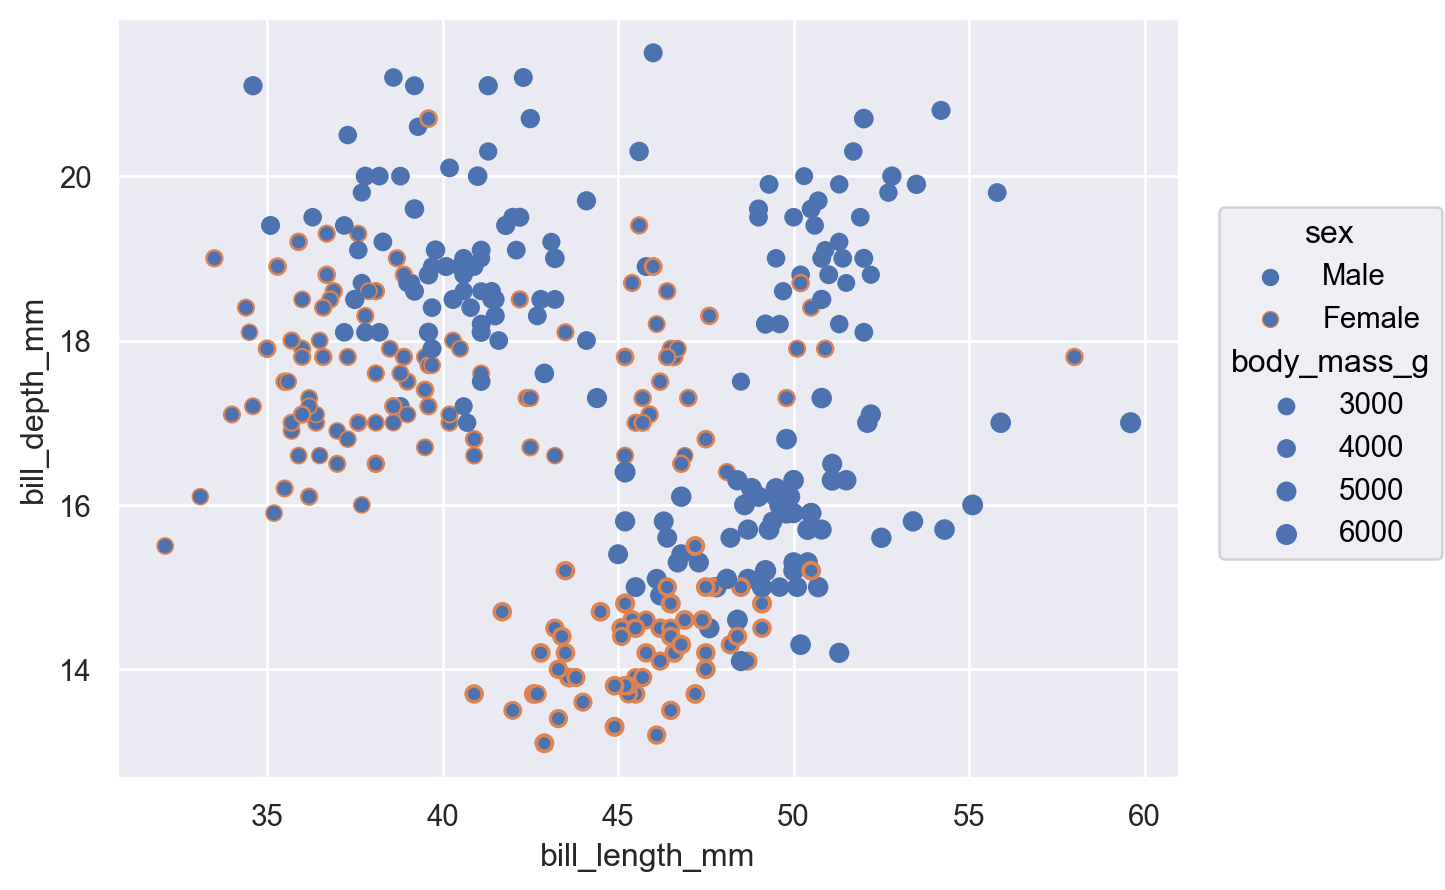

In [12]:
(
    so.Plot(penguins , x = 'bill_length_mm' , y = 'bill_depth_mm' , edgecolor='sex' , edgewidth='body_mass_g')
    .add(so.Dot())
)

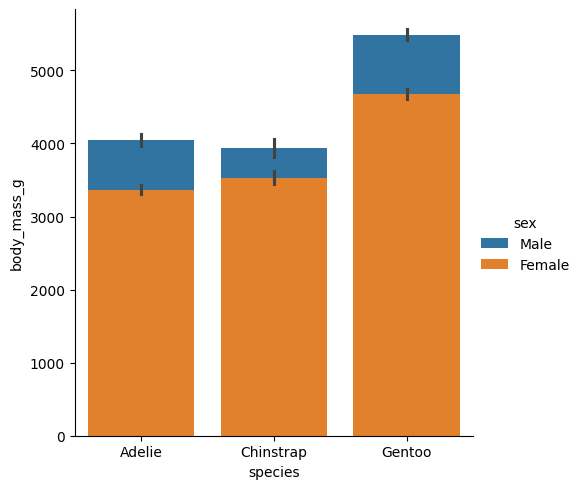

In [13]:
sns.catplot(penguins , x = 'species' , y = 'body_mass_g' , hue = 'sex', kind = 'bar' , dodge = False)

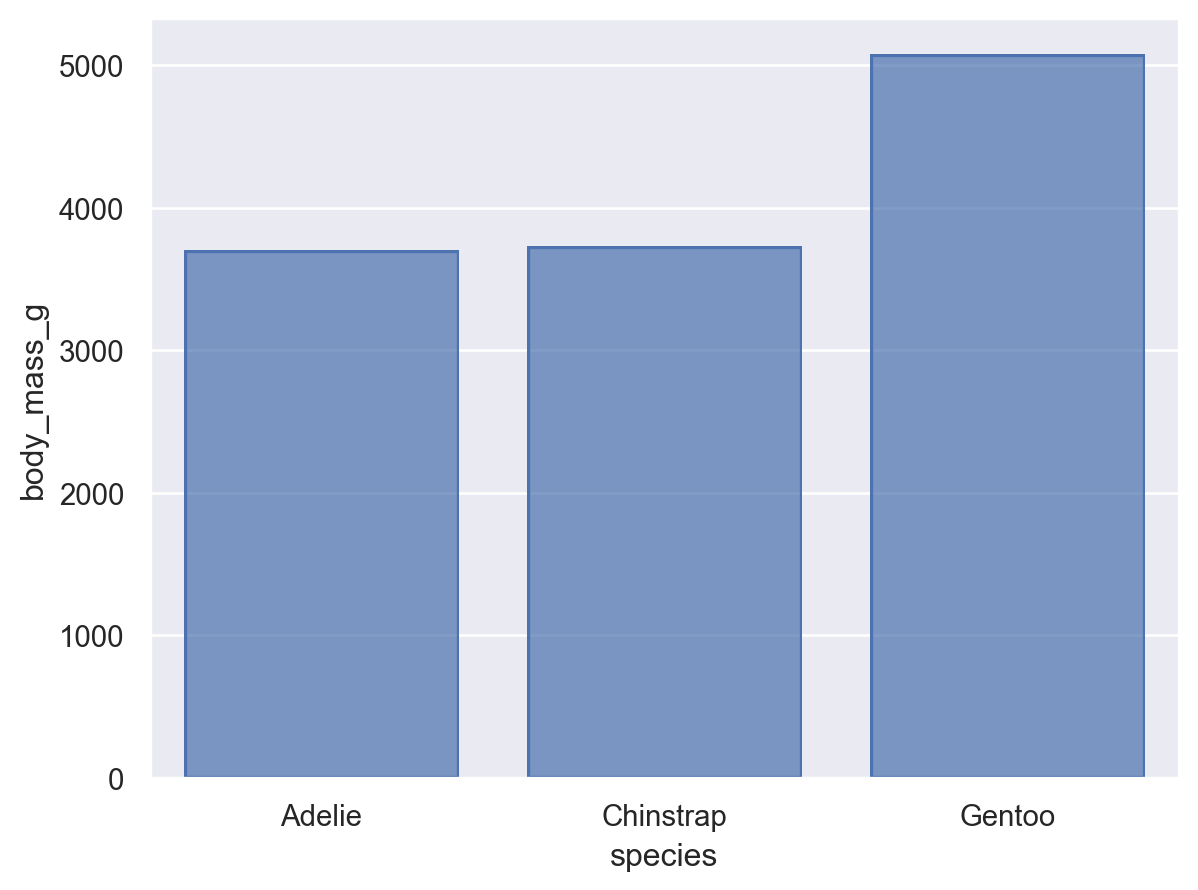

In [14]:
(
    so.Plot(penguins , x = 'species' , y = 'body_mass_g')
    .add(so.Bar() , so.Agg())
)

In [15]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


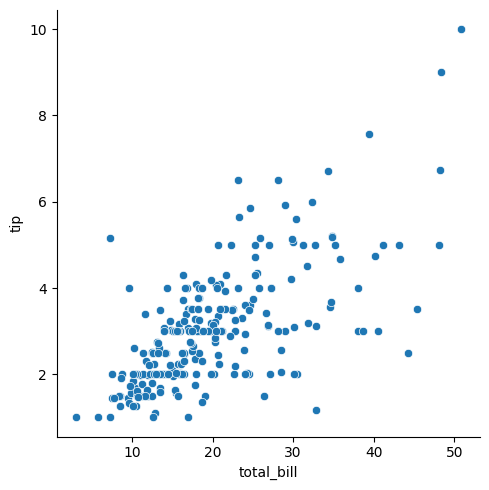

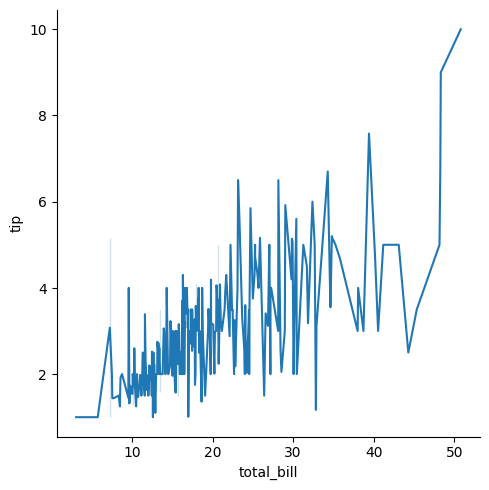

In [16]:
sns.relplot(tips , x = 'total_bill' , y = 'tip' , kind = 'scatter')
sns.relplot(tips , x = 'total_bill' , y = 'tip' , kind = 'line')

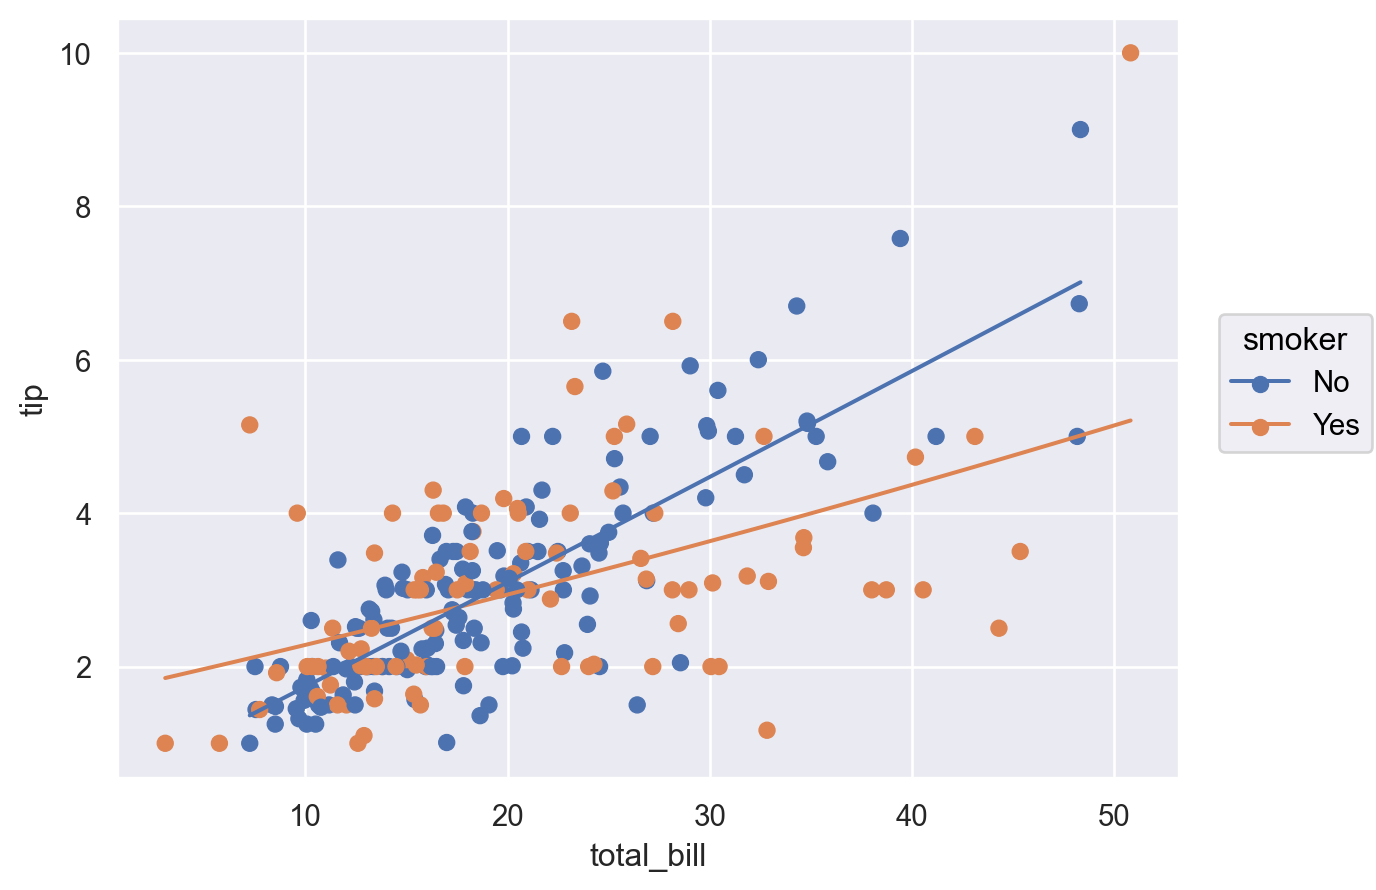

In [17]:
(
    so.Plot(tips , x = 'total_bill' , y = 'tip' , color = 'smoker')
    .add(so.Dot())
    .add(so.Line() , so.PolyFit())
)

In [18]:
fmri = sns.load_dataset('fmri')
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


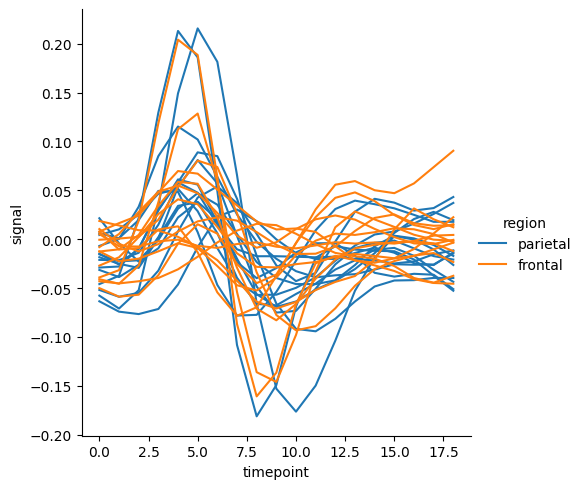

In [ ]:
sns.relplot(fmri[fmri['event'] == 'cue'] , x = 'timepoint' , y = 'signal' , kind = 'line' , units = 'subject' , hue = 'region' , estimator = None)


In [31]:
health = sns.load_dataset('healthexp')
health

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


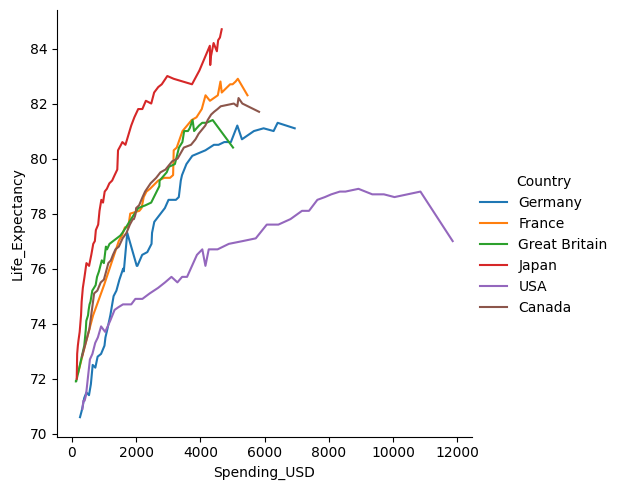

In [67]:
sns.relplot(health , x = 'Spending_USD' , y = 'Life_Expectancy' , kind = 'line'  , hue = 'Country' ,  estimator = None )